# Pratishtha Singh-8927578830

### LASSO and Boosting for Regression-(b)

In [564]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
col_names=["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite",
"racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
"pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap",
"blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade",
"PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf",
"MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par",
"PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5",
"PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly",
"PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
"PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded",
"PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ",
"RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet",
"PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop",
"LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop",
"RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
"NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr",
"LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]
predictive_column_names=["population","householdsize","racepctblack","racePctWhite",
"racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
"pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap",
"blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade",
"PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf",
"MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par",
"PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5",
"PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly",
"PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
"PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded",
"PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ",
"RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet",
"PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop",
"LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop",
"RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
"NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr",
"LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

There are 5 non predictive features (state, country, community, communityname and fold) so I have removed them from the column names.

In [283]:
df=pd.read_csv('communities.csv',header=None,names=col_names)
df0=df.loc[:, 'population' :]
df0.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


df.iloc reference from https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

In [150]:
print("Number of missing values in each column:")
print(df1.isnull().sum())

Number of missing values in each column:
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                1
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
                        ... 
PctSameHouse85             0
PctSameCity85              0
Pc

In [151]:
df1=df0.replace('?', np.NaN)
for c in predictive_column_names:
    df1[c]=pd.to_numeric(df1[c])

# df1.dtypes

replace reference from https://machinelearningmastery.com/handle-missing-data-python/

pd.to_numeric reference from https://stackoverflow.com/questions/16729483/converting-strings-to-floats-in-a-dataframe

In [156]:
df2=df1.fillna(df1.mean())
df2.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


### LASSO and Boosting for Regression-(a)

In [176]:
Train_data=df2.loc[0:1495,:]
Test_data=df2.loc[1495:,:]
Train_data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


### LASSO and Boosting for Regression-(c)

correlation matrix


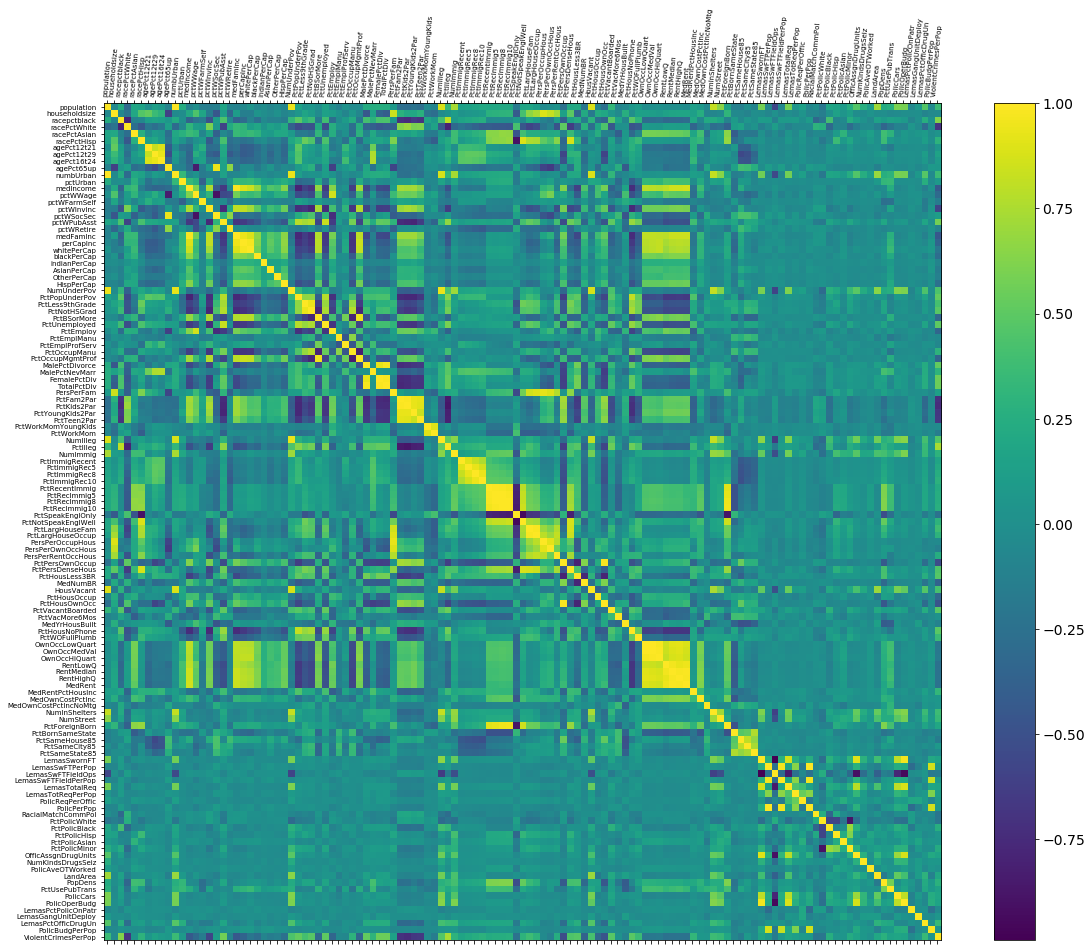

In [175]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=7, rotation=85)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=7)
cb = plt.colorbar()
print("Correlation Matrix:")

correlation matrix reference from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

### LASSO and Boosting for Regression-(d)

In [204]:
CV=df2.std()/df2.mean()
CoeffVar=pd.DataFrame({"Feature":CV.index, "Coefficient of Variation":CV.values})
CoeffVar

,Feature,Coefficient of Variation
0,population,2.203503
1,householdsize,0.353298
2,racepctblack,1.410920
3,racePctWhite,0.323782
4,racePctAsian,1.359162
5,racePctHisp,1.614278
6,agePct12t21,0.365840
7,agePct12t29,0.290693
8,agePct16t24,0.495161
9,agePct65up,0.423442


### LASSO and Boosting for Regression-(e)

In [213]:
df3=CoeffVar.sort_values(by=["Coefficient of Variation"],ascending=False).reset_index(drop=True)
df3

,Feature,Coefficient of Variation
0,NumStreet,4.407702
1,NumInShelters,3.485481
2,NumIlleg,2.994196
3,NumImmig,2.900497
4,LemasPctOfficDrugUn,2.555266
5,NumUnderPov,2.304970
6,population,2.203503
7,numbUrban,2.001744
8,HousVacant,1.958780
9,LandArea,1.678031


In [226]:
coeff_var=df3.loc[0:11]
coeff_var

,Feature,Coefficient of Variation
0,NumStreet,4.407702
1,NumInShelters,3.485481
2,NumIlleg,2.994196
3,NumImmig,2.900497
4,LemasPctOfficDrugUn,2.555266
5,NumUnderPov,2.304970
6,population,2.203503
7,numbUrban,2.001744
8,HousVacant,1.958780
9,LandArea,1.678031


I have selected the top 11 features that have the highest value of coefficient of variation because sqrt(128)=11

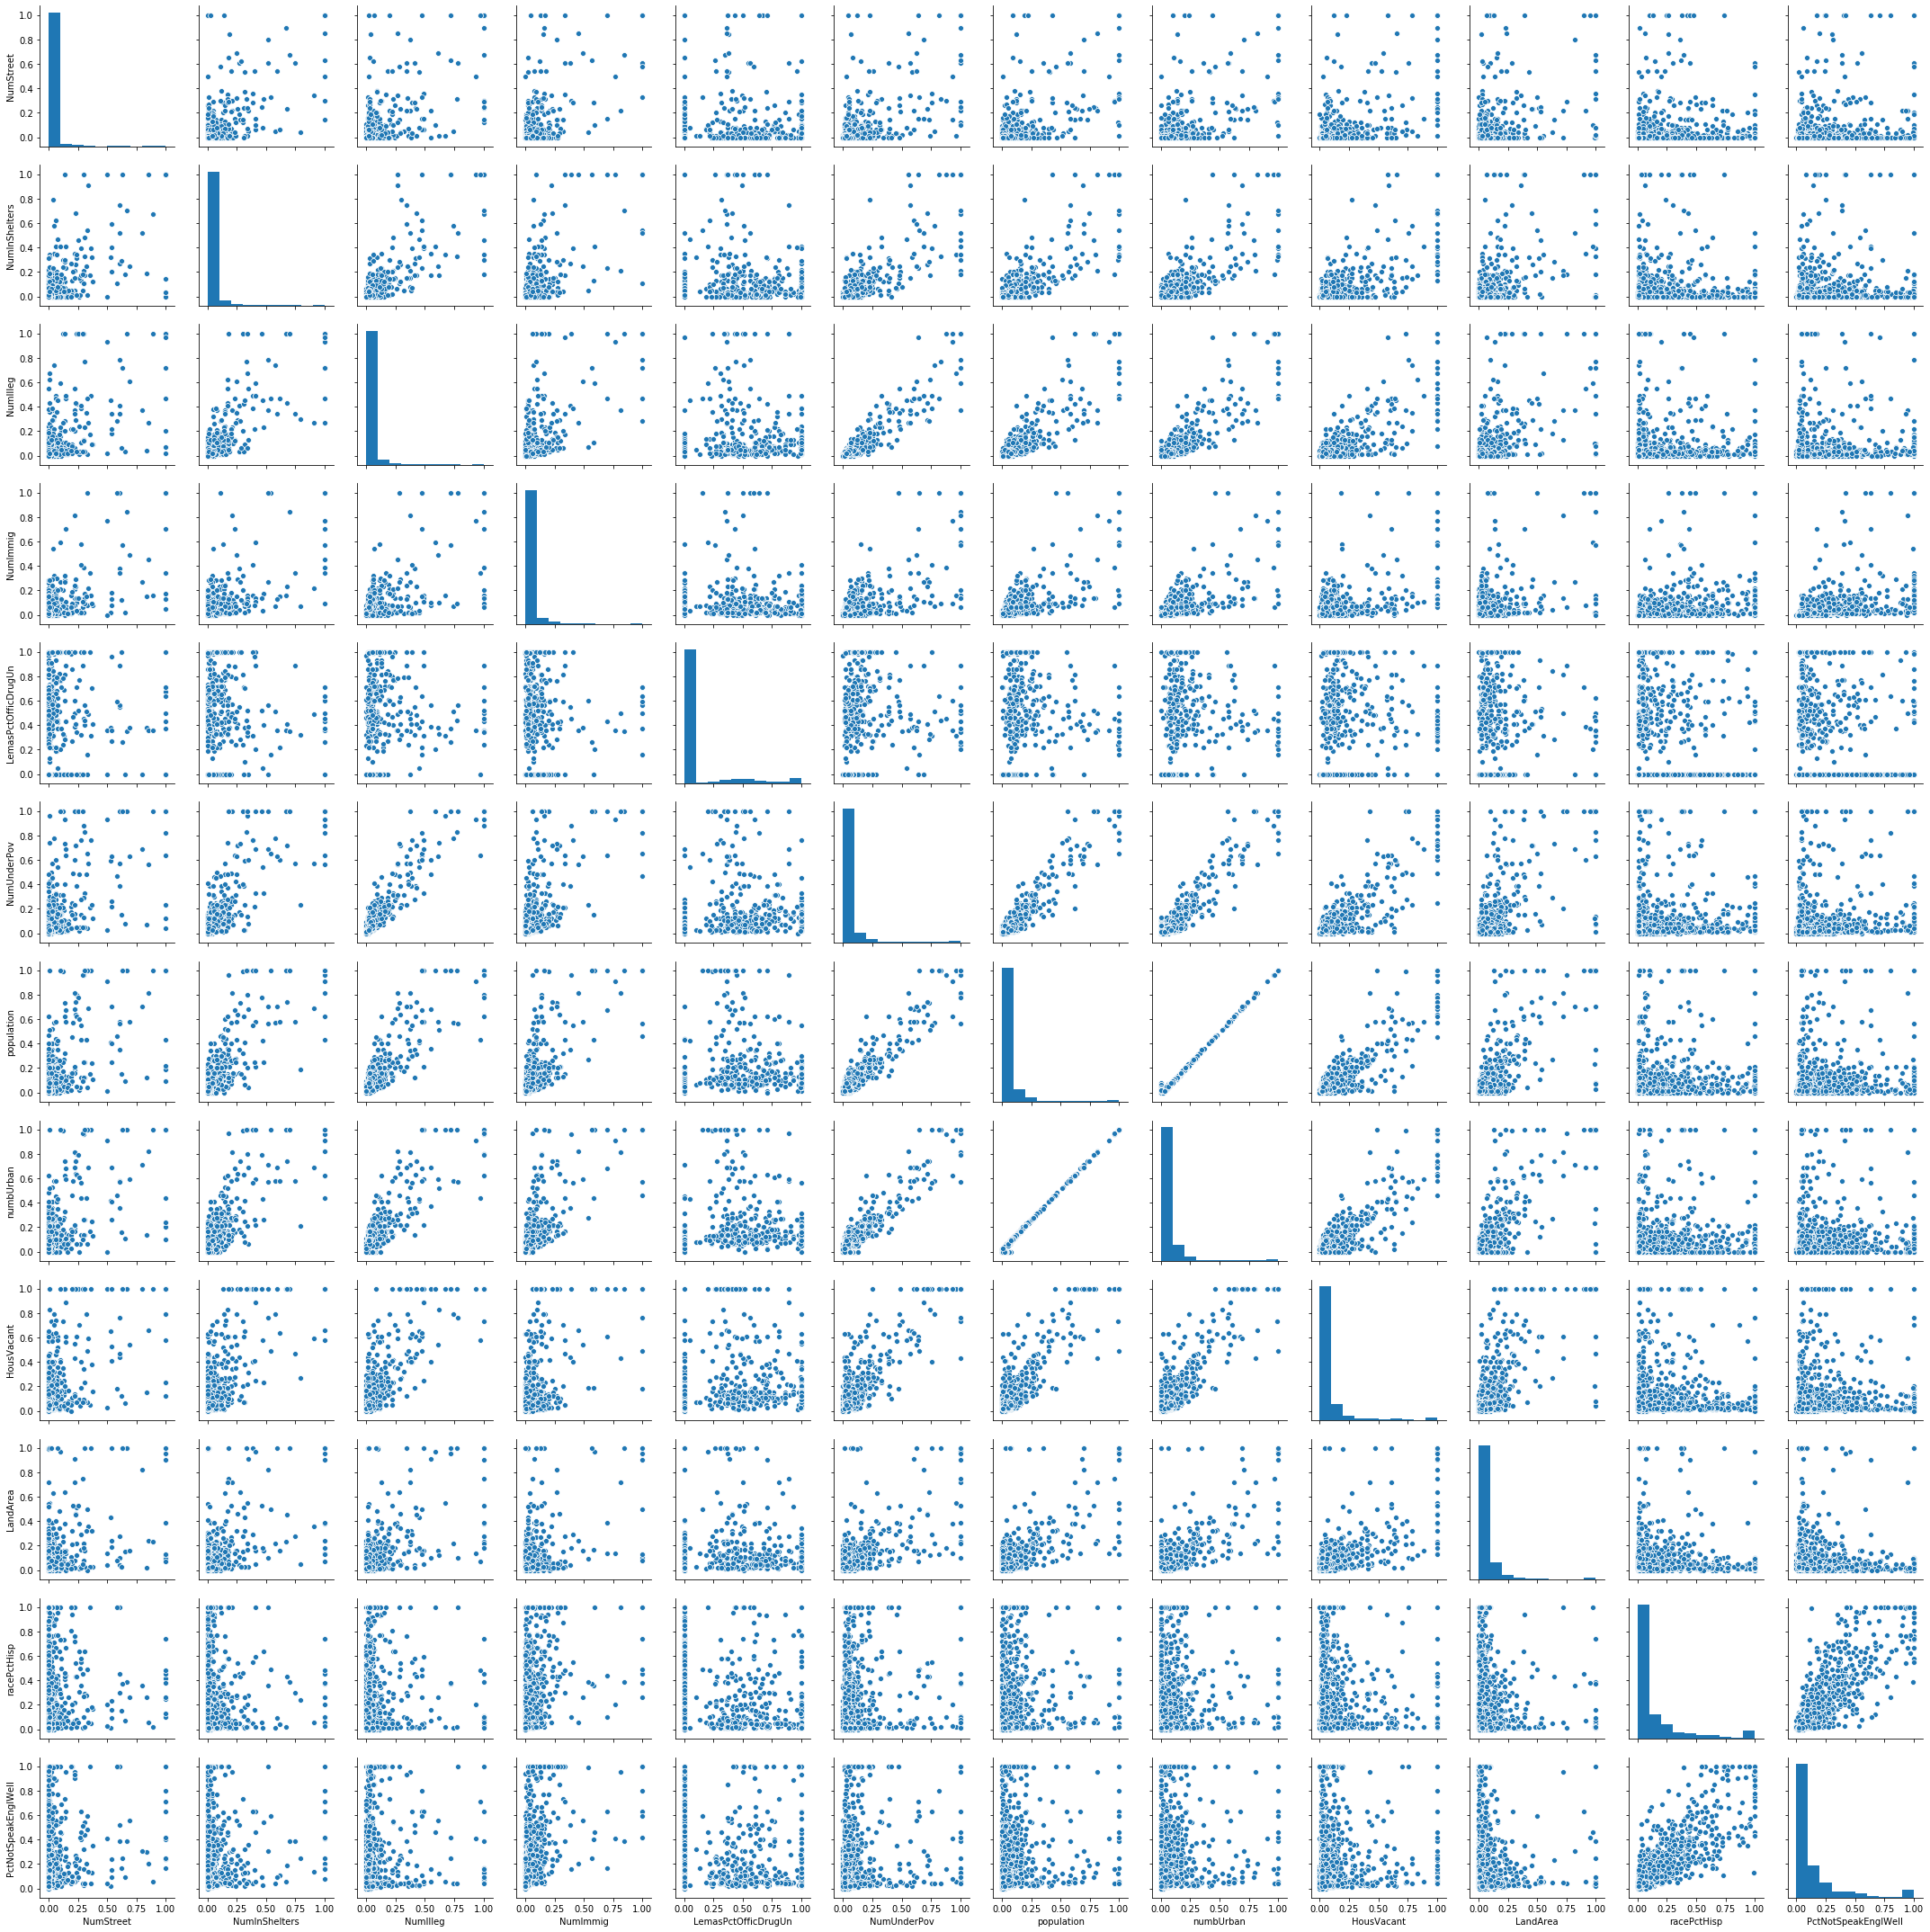

In [261]:
col_name=["NumStreet","NumInShelters","NumIlleg","NumImmig","LemasPctOfficDrugUn","NumUnderPov","population","numbUrban",
          "HousVacant","LandArea","racePctHisp","PctNotSpeakEnglWell"]
df4=df2[col_name]
g=sns.pairplot(df4)

No much can be concluded about the significance of the features from the scatterplots but we can notice some things:

(a) NumIlleg & NumUnderPov, NumIlleg & population and  NumIlleg & numbUrban have an almost linear positive correlation with each other. 

(b) population & NumIlleg have a strong linear positive correlation with each other. 

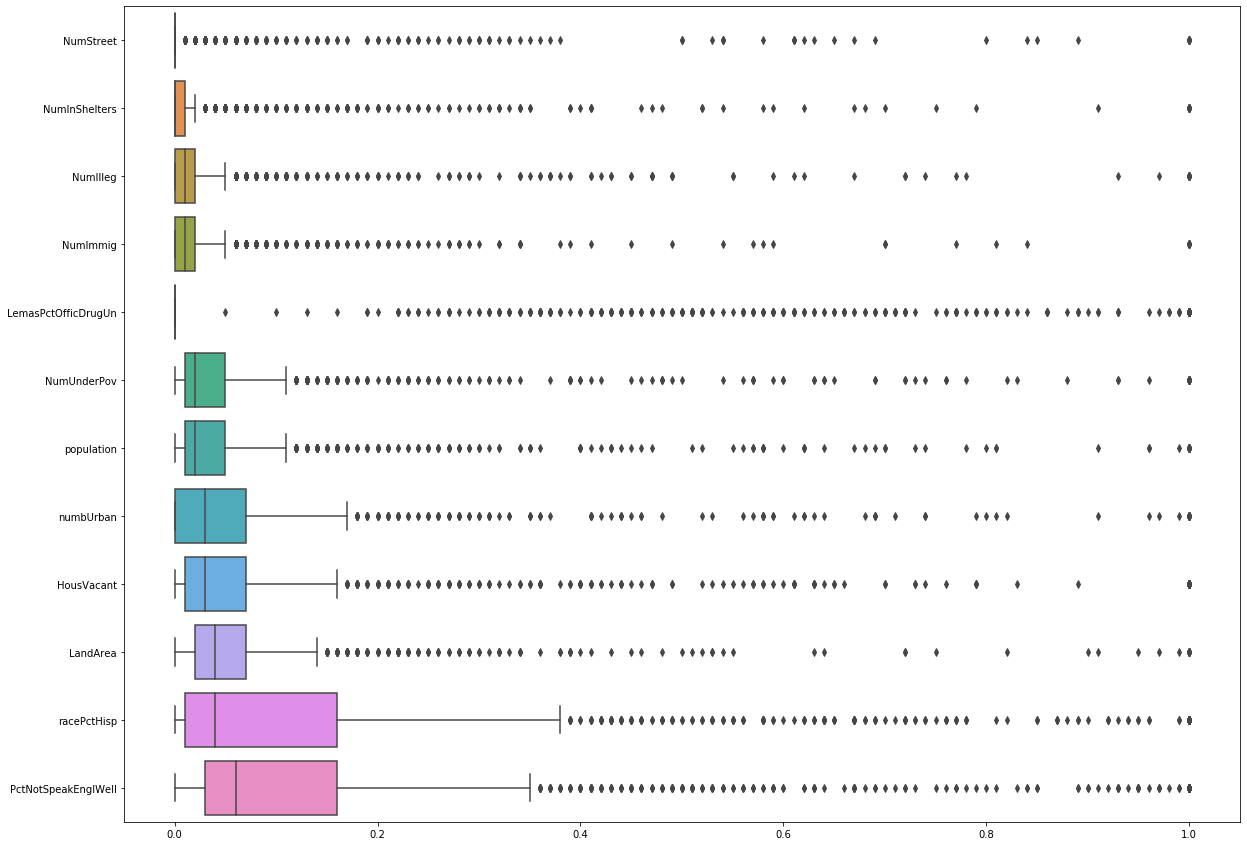

In [272]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df4,orient='h')

boxplot reference from https://seaborn.pydata.org/generated/seaborn.boxplot.html

figsize reference from https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431

### Linear Regression using Least Squares-(f)

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Train_X=Train_data.iloc[:, 0:122]
Train_Y=Train_data.iloc[:, 122:123]
Test_X=Test_data.iloc[:, 0:122]
Test_Y=Test_data.iloc[:, 122:123]
reg=LinearRegression().fit(Train_X,Train_Y)
ypred=reg.predict(Test_X)
# print(ypred)
mse_linear_reg=mean_squared_error(Test_Y,ypred)
print("Test Error for linear regression=",mse_linear_reg)

Test Error for linear regression= 0.7901932501416866


### Ridge Regression-(g)

In [395]:
from sklearn.linear_model import Ridge, RidgeCV
alphas_r = 10**np.linspace(10,-2,100)*0.5   #array of alpha values ranging from very big to very small to cover all possible scenarios
ridgecv = RidgeCV(alphas = alphas_r, scoring = 'neg_mean_squared_error', normalize = True)   #generalized cross validation
ridgecv.fit(Train_X, Train_Y)
print("Best value of the tuning paramater chose by cross validation=",ridgecv.alpha_)

Best value of the tuning paramater chose by cross validation= 0.0466301673441609


In [396]:
ridge_reg = Ridge(alpha = 0.0466, normalize = True)
ridge_reg.fit(Train_X, Train_Y)
y_pred=ridge_reg.predict(Test_X)
mse_ridge_reg=mean_squared_error(Test_Y, y_pred)
print("Test Error for Ridge Regression=",mse_ridge_reg)

Test Error for Ridge Regression= 0.017562807170783096


Ridge Regression reference from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

### LASSO-(h)

In [523]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = alphas_r, cv = 5, max_iter = 100000)   #5 fold cross validation
lassocv.fit(Train_X, Train_Y)
print("Best value of the tuning paramater chose by cross validation=",lassocv.alpha_)

Best value of the tuning paramater chose by cross validation= 0.005


C:\Users\Pratishtha Singh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [524]:
lasso= Lasso(alpha=0.005)
lasso.fit(Train_X, Train_Y)
y_pred=lasso.predict(Test_X)
mse_lasso=mean_squared_error(Test_Y, y_pred)
print("Test Error for Lasso before standardization=",mse_lasso)

Test Error for Lasso before standardization= 0.018808627793729153


Lasso reference from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

In [525]:
coefficient=list(lasso.coef_)
cols_list=list(Train_X.columns)
print("List of variables selected by the model before standardization:")
for j in range(len(coefficient)):
    if coefficient[j]!=0.0 and coefficient[j]!=-0.0:
        print(cols_list[j])
#8 variables selected

List of variables selected by the model before standardization:
racePctWhite
pctUrban
MalePctDivorce
PctKids2Par
PctIlleg
PctPersDenseHous
HousVacant
PctVacantBoarded


In [529]:
from sklearn.preprocessing import StandardScaler
standard_train_x=StandardScaler().fit_transform(Train_X)
standard_test_x=StandardScaler().fit_transform(Test_X)
lassocv_std = LassoCV(alphas = alphas_r, cv = 5, max_iter = 100000)   #5 fold cross validation
lassocv_std.fit(standard_train_x, Train_Y)
print("Best value of the tuning paramater chosen by cross validation=",lassocv_std.alpha_)

Best value of the tuning paramater chose by cross validation= 0.005


C:\Users\Pratishtha Singh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [530]:
lasso_std= Lasso(alpha=0.005)
lasso_std.fit(standard_train_x, Train_Y)
y_pred=lasso_std.predict(standard_test_x)
mse_lasso=mean_squared_error(Test_Y, y_pred)
print("Test Error for Lasso after standardization=",mse_lasso)

Test Error for Lasso after standardization= 0.017555419397557427


In [528]:
coeff=list(lasso_std.coef_)
col_list=list(Train_X.columns)
list1=[]
print("List of variables selected by the model after standardization:")
for j in range(len(coeff)):
    if coeff[j]!=0.0 and coeff[j]!=-0.0:
        print(col_list[j])
#60 variables selected

List of variables selected by the model after standardization:
racepctblack
racePctWhite
agePct12t29
pctUrban
pctWInvInc
pctWPubAsst
pctWRetire
AsianPerCap
MalePctDivorce
PctKids2Par
PctWorkMom
PctIlleg
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedRentPctHousInc
MedOwnCostPctIncNoMtg
NumStreet
PctForeignBorn
LemasTotReqPerPop
PolicReqPerOffic
LemasGangUnitDeploy
LemasPctOfficDrugUn


### Principal Component Regression-(i)

In [516]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
M=122
mean_sq_err=[]
pca = PCA()
X_reduced = pca.fit_transform(standard_train_x)
n = len(X_reduced)
for m in range(M):
    model = LinearRegression()
    kf_10 = model_selection.KFold( n_splits=5, random_state=1)  #10 fold cross validation
    cv10  = cross_val_score(model, X_reduced[:, 0:m+1], Train_Y, cv=5, scoring='neg_mean_squared_error')
    mean_sq_err += [np.mean(np.abs(cv10))]   #np.abs for finding the absolute value of cross validation scores
print(mean_sq_err[94])
print("Minimum value of MSE=",min(mean_sq_err))
  

0.019449108930969
Minimum value of MSE= 0.019449108930969


Minimum Mean Squared Error is at m=94, i.e. best value of M is 95. Therefore, the number of principal components should be 95. 

PCA refrence from https://nbviewer.jupyter.org/github/a-martyn/ISL-python/blob/master/Notebooks/ch6_linear_model_selection_and_regularisation_applied.ipynb

PCA reference from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html

In [519]:
pca_n=PCA(n_components=95)
pca_train_x=pca_n.fit_transform(standard_train_x)
pca_test_x=pca_n.fit_transform(standard_test_x)

regr = LinearRegression()
regr.fit(pca_train_x, Train_Y)
y_pred= regr.predict(pca_test_x)
mse=mean_squared_error(Test_Y, y_pred)
print("Test Error for PCA=",mse)

Test Error for PCA= 0.04630313415251964


### XG Boost-(j)

In [531]:
! pip install xgboost

In [563]:
import warnings
warnings.filterwarnings(action='ignore')
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

params ={
    'reg_alpha':[1e-3, 1e-2, 0.1, 1, 10]
}
model = xgb.XGBRegressor()
gscv=GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='r2', verbose=True)
grid_model=gscv.fit(Train_X, Train_Y)
C_value=grid_model.best_estimator_
y_pred=grid_model.predict(Test_X)
mse=mean_squared_error(Test_Y, y_pred)
print("Test Error for XGBoost=",mse)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[12:17:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:17:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:01] WARNI

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.7s finished


[12:18:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test Error for XGBoost= 0.01693841213262631


'reg_alpha' reference from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

Test Error in Linear Regression using least squares=0.7902

Test Error in Ridge Regression=0.0176

Test Error in Lasso before standardization=0.0188

Test Error in Lasso after standardization=0.0176

Test Error in PCR Model=0.0463

Test Error in XGBoost model using L1 penalized regression= 0.0169

We can see that test error is the lowest in the XGBoost model using L1 penalized regression which means that it is the best method to use for this dataset. 

The highest test error is given by Linear Regression using least squares which is about 79%. It indicates that the dataset is highly non-linear. 